In [2]:
import numpy as np
def pontos2d(w,P):
    np.random.seed(31)
    X = 5*np.random.random_sample(P)
    X = np.array(X)
    Y = np.sin(X[:])+0.2*np.random.random_sample(P)
    return X,Y

def f(v,x):
    return np.sin(v[0] + v[1]*x)

def model(w,v,x_p):
    a = w[0] + f(v,x_p)*w[1]
    return a

In [3]:
def NL_regression(w,v,x,y):
    P = len(x)
    cost = 0
    for p in range (P):
        cost = cost + (model(w,v,x[p]) - y[p])**2
    return cost/P

def NL_grad(w,v,x,y):
    P = len(x)
    grad = np.zeros(4)
    for p in range(P):
        k = 2 * (model(w,v,x[p]) - y[p])
        grad[0] += k
        grad[1] += k * f(v,x[p])
        grad[2] += k * np.cos(v[0]+x[p]*v[1]) * w[1]
        grad[3] += k * np.cos(v[0]+x[p]*v[1]) * w[1] * x[p]
    grad = grad / P
    return grad

def grad_desc(w,v,x,y,alpha,max_its):
    w_THETA = [w[0],w[1],v[0],v[1]]
    w_THETA = np.array(w_THETA)
    w_h = [w_THETA]
    cost1 = NL_regression(w,v,x,y)
    #print(cost1)
    cost_h = [cost1]
    for k in range(max_its):
        #print(k,w_THETA)
        #print(w,v)
        w_THETA = w_THETA - alpha * NL_grad(w,v,x,y)
        w_h.append(w_THETA)
        #print(0,w,v)
        w[0] = w_THETA[0]
        w[1] = w_THETA[1]
        v[0] = w_THETA[2]
        v[1] = w_THETA[3]
        #print(1,w,v)
        cost2 = NL_regression(w,v,x,y)
        #print(2,w,v)
        cost_h.append(cost2)
        print(cost2)
        if cost2 > cost1:
            alpha = alpha / 10 
            print('alpha=',alpha)
        cost1 = cost2
    return w_h,cost_h

In [4]:
import matplotlib.pyplot as plt

P = 100
w = np.array([1.,1.])
v = np.array([1.,1.])
[X,Y] = pontos2d(w,P)
max_its = 2000
alpha = 1
[w_h,cost_h] = grad_desc(w,v,X,Y,alpha,max_its)

0.4889580533737108
0.20042157240581523
0.27648270832104016
alpha= 0.1
0.24188022699750825
0.23704963050340472
0.2341585806604251
0.23156967200945716
0.22921995712458748
0.22707933693368876
0.2251224154979993


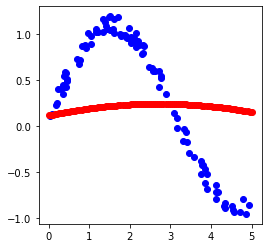

In [5]:
for k in range(1,max_its,50):
    plt.figure(figsize = (4,4))
    plt.scatter(X,Y,c='b')
    x = np.linspace(0,5,100)
    w[0] = w_h[k][0]
    w[1] = w_h[k][1]
    v[0] = w_h[k][2]
    v[1] = w_h[k][3]
    y = model(w,v,x)
    plt.scatter(x,y,c='r')
    plt.show()
plt.show()